<a href="https://colab.research.google.com/github/dynasty-29/Knn_NaiveBayes_project/blob/main/Titanic__project_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

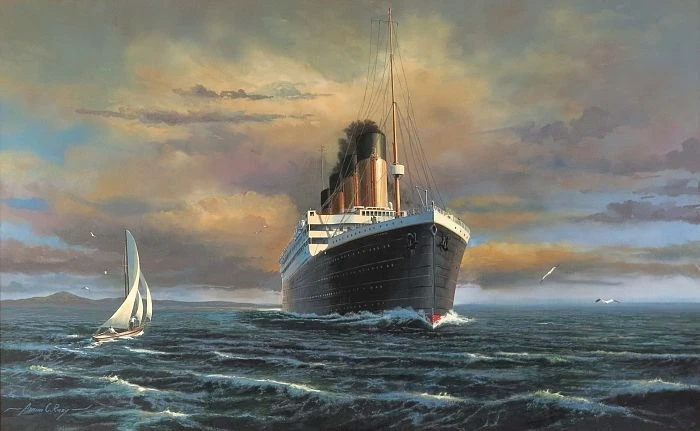
# **Introduction**

The data given is from the titanic dataset  and it consist of the following features:
* Survived: Outcome of survival (0 = No; 1 = Yes)
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Name: Name of passenger
* Sex: Sex of the passenger
* Age: Age of the passenger (Some entries contain NaN)
* SibSp: Number of siblings and spouses of the passenger aboard
* Parch: Number of parents and children of the passenger aboard
* Ticket: Ticket number of the passenger
* Fare: Fare paid by the passenger
* Cabin Cabin number of the passenger (Some entries contain NaN)
* Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
## **Problem Statement**
The project aims to determine the best KNN model that can be used to predict survival while training and testing the dataset with different split and come up with the best split.
## **Objective**
To determine the split that produces the best accuracy

## **Metrics of success**

* Read and explore the given dataset.

* Finding and dealing with outliers, anomalies, and missing data within the dataset.

* Performing univariate, bivariate and multivariate analysis.

* Performing K-nearest neighbor classification while splitting the datasets differently 80-20, 70-30, 60-40,.

* Applying optimization techniques.

* Challenge the solution by providing insights on how you can make improvements in model improvement.

## **Data Understanding**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading my dataset
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')


In [3]:
#Number of records and columns
train.shape

(891, 12)

In [4]:
#First five rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Last five rows
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## **Data Preparation and Cleaning**

**1. Validity check**

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#We don't need the id column so we drop it
train = train.drop(['PassengerId'], axis=1)

Our data sets columns are properly named

**2. Accuracy check**

In [8]:
#Checking data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


**3. Completeness check**

In [9]:
#checking for null values
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We have null in Age and cabin columns for our datasets plus embarked .



In [10]:
#we will replace the NAN on age column with the mean age 
train['Age'].replace([np.nan], train['Age'].mean(), inplace=True)

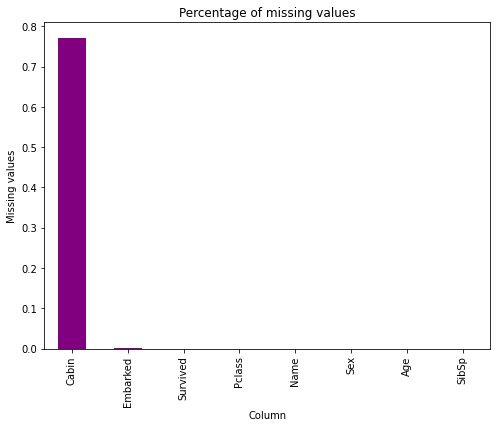

In [11]:
#Check for nulls visually
train.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

We can see that the number of null in cabin are over 75% so will drop this columns from our dataset

In [12]:
train = train.drop(['Cabin'], axis=1)

We still have a null on embarked so will replace them accordingly:

In [13]:
#we will replace the NAN on age column with the mean age 
train['Embarked'].replace([np.nan], train['Embarked'].mode(), inplace=True)

Now we check to see if we have any more nulls

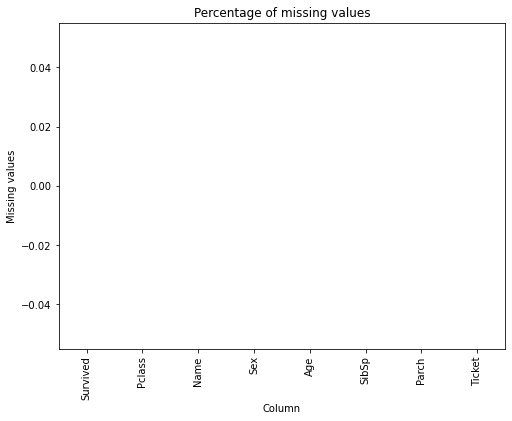

In [14]:
#Check for nulls visually
train.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [15]:
# converting column variables from float to int 
train['Age'] = train['Age'].astype(int)
train['Fare'] = train['Fare'].astype(int)

We have no more nulls

**4. Consistency check**

In [16]:
#Checking for duplicates
train.duplicated().sum()

0

**5. Uniformity check**

In [17]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

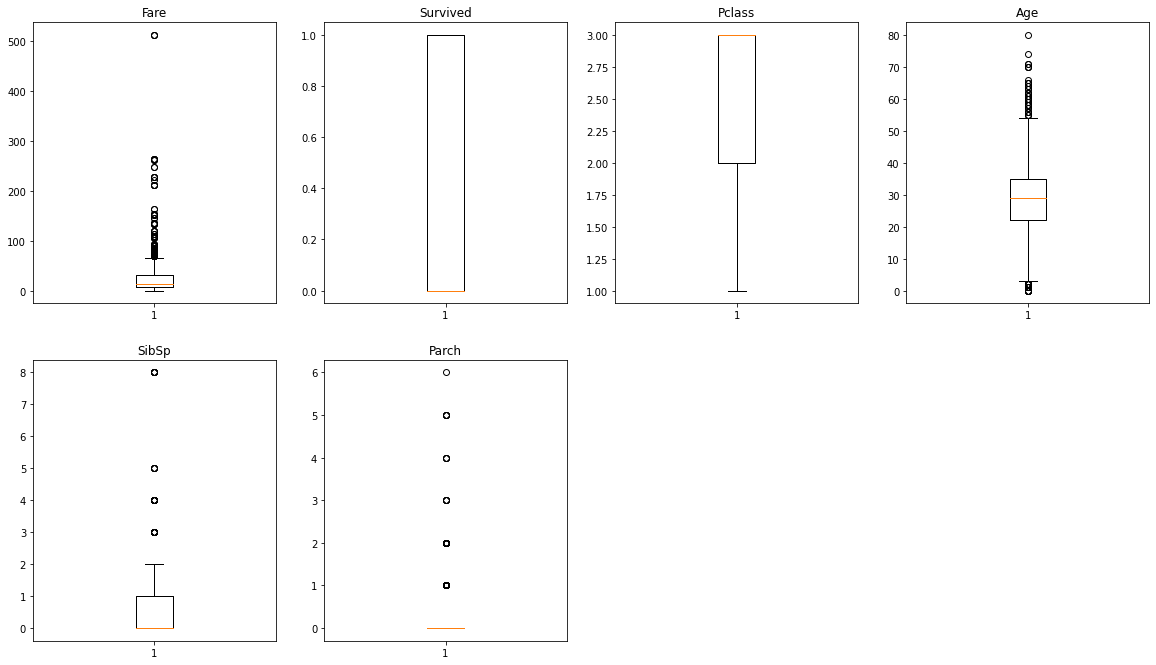

In [18]:
#Checking for ourliers
cols = {'Fare': 1, 'Survived': 2, 'Pclass': 3, 'Age': 4, 'SibSp': 5, 'Parch': 6}
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in cols.items():
  plt.subplot(5,4,i)
  plt.boxplot(train[variable])
  plt.title(variable)

plt.show()



In [19]:
# dealing with the outliers using quantiles
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df.shape)

(579, 10)


## **Exploratory Data Analysis**

### **1. Univariate Analysis**

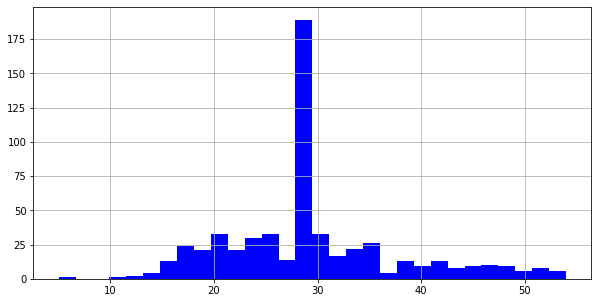

In [20]:
#Distribution plot
df['Age'].hist(bins = 30, figsize = (10,5), color = 'blue')

Most of the Passenger are between 29 and 30 

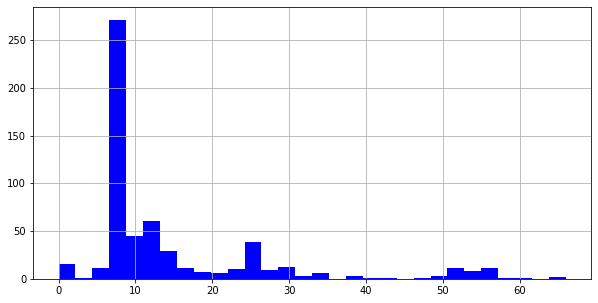

In [21]:
#Distribution plot
df['Fare'].hist(bins = 30, figsize = (10,5), color = 'blue')

The highest fare was around 7 to 10 thousand dollars

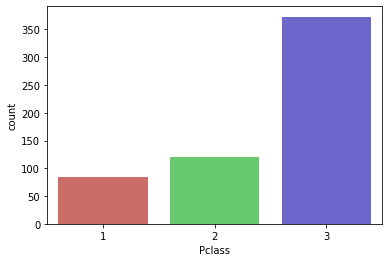

In [22]:
#Class counts visual
sns.countplot(x='Pclass',data=df, palette='hls')

Class 3 (Lower class) had the maximum number of passengers compared to 1 and 2(Upper and Middle class)

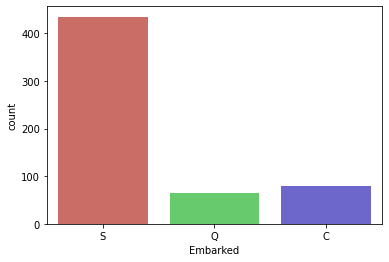

In [23]:
#Embarked counts visual
sns.countplot(x='Embarked',data=df, palette='hls')

 Most passenger Embarked from Southampton(S) while Cherbourg(C) and Queenstown (Q) had almost equal number of passenger who embarked from there.

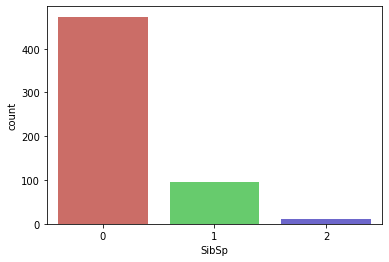

In [24]:
#Number of sibling/Spouse on board count counts visual
sns.countplot(x='SibSp',data=df, palette='hls')

Most of the Passengers travelled alone with no siblings or spouse

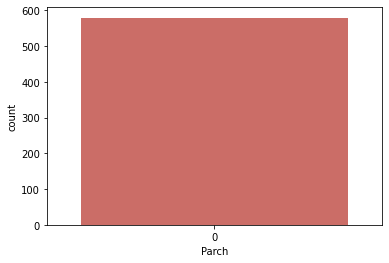

In [25]:
#Number of parents or children each passenger was touring with counts visual
sns.countplot(x='Parch',data=df, palette='hls')

None of the passengers were travelling with parent or child

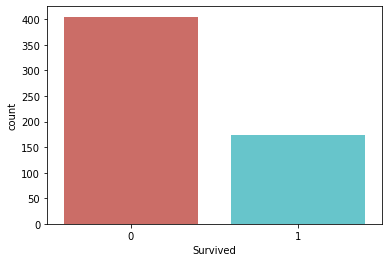

In [26]:
#Survival counts visual
sns.countplot(x='Survived',data=df, palette='hls')

Most Passengers did survive

### **2. Bivariate Analysis**

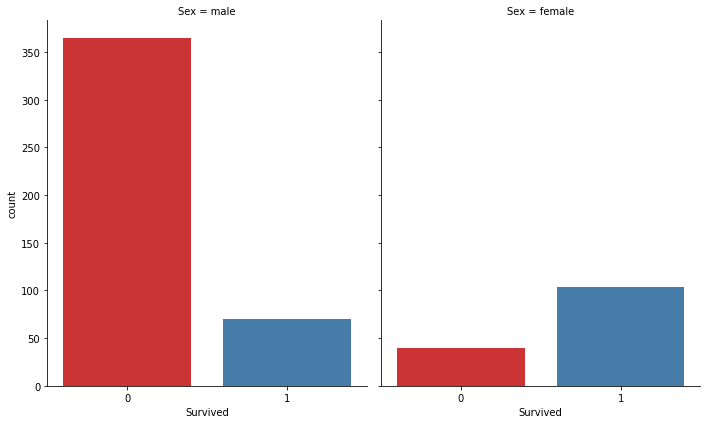

In [27]:
# Visual comparison of gender versus Survival
#
sns.catplot("Survived", col="Sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

More females survived compared to men

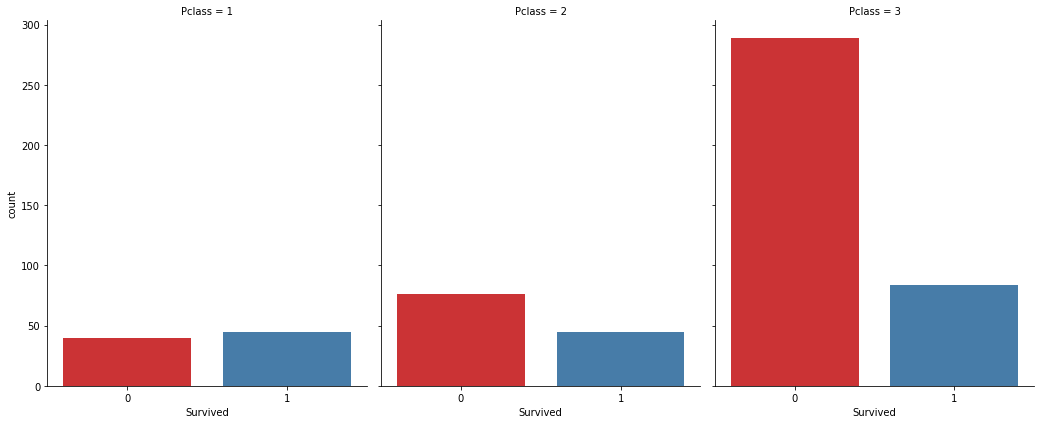

In [28]:
# Visual comparison of gender versus Survival
#
sns.catplot("Survived", col="Pclass", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

There were more passengers who died in Lower class compared to other classes not forgetting this class had the most passengers

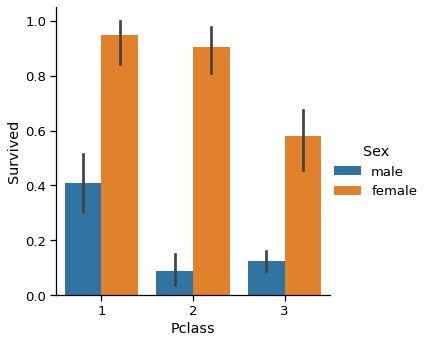

In [29]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Pclass',
        y='Survived',
        hue='Sex',
        kind='bar',
        data=df,
    )

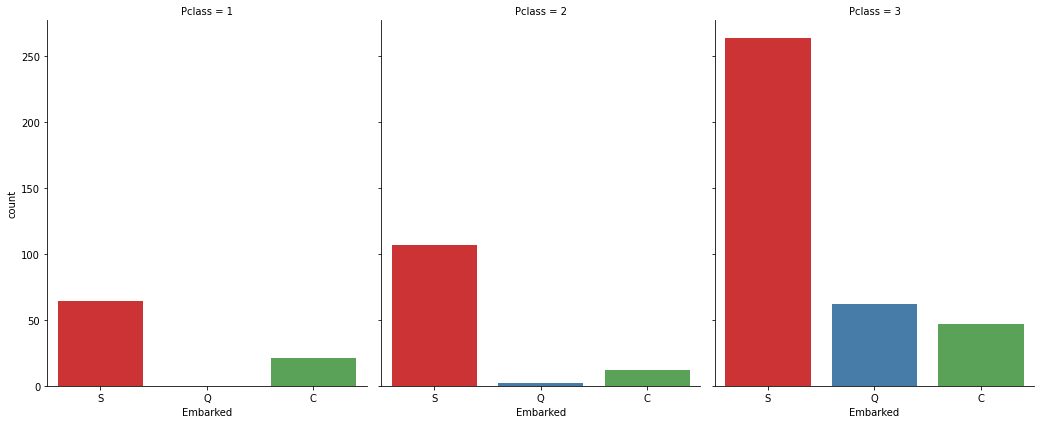

In [30]:
# Visual comparison of Embark versus class
#
sns.catplot("Embarked", col="Pclass", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

Most Passengers Embarked in Southhampton for all the three classes. There was no one from queens in first class

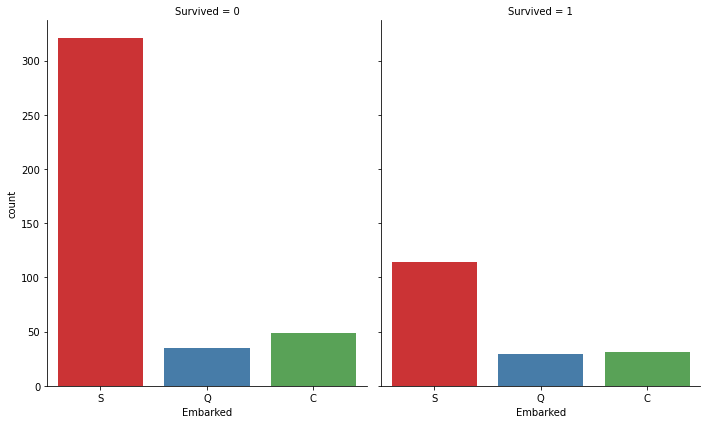

In [31]:
# Visual comparison of Embark versus Survival
#
sns.catplot("Embarked", col="Survived", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

### **3. Multivariate Analysis**

In [32]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,579.000000,579.000000,579.000000,579.000000,579.0,579.000000
mean,0.300518,2.497409,29.535406,0.202073,0.0,14.682211
std,0.458880,0.737932,8.512968,0.446744,0.0,12.996242
min,0.000000,1.000000,5.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.0,7.000000
50%,0.000000,3.000000,29.000000,0.000000,0.0,8.000000
75%,1.000000,3.000000,32.000000,0.000000,0.0,16.000000
max,1.000000,3.000000,54.000000,2.000000,0.0,66.000000


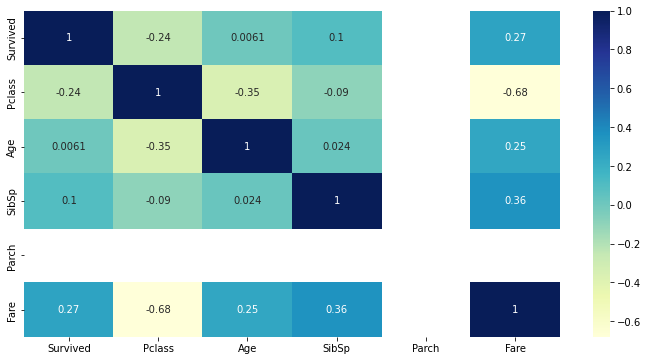

In [33]:
# plotting the correlation using a heatmap
fig, ax = plt.subplots(figsize=(12,6))  
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Our numerical data has no correlation

## **Modeling**

In [34]:
#Just to remind ourselves how our data looks like
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S
5,0,3,"Moran, Mr. James",male,29,0,0,330877,8,Q


In [35]:
#Encoding our categorical variable
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Sex']= label_encoder.fit_transform(df['Sex'])

df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,S
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,S


In [36]:
#droping Unnecessary columns moving foward
df = df.drop(['Name', 'Ticket', 'Embarked'], axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22,1,0,7
2,1,3,0,26,0,0,7


In [37]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [38]:
#Preprocessing
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [39]:
#Data Reduction 
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X, y)


LinearDiscriminantAnalysis()

## **1. 80:20 set**

In [40]:
# Train Test Split
#will have 80% of the dataset for training and 20% for our model testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [41]:
# Training 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Predictions 

y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1])

In [43]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[63  9]
 [24 20]]


Our model is able to make a correct prediction of  66 and 17 variables 

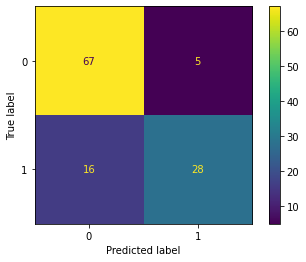

In [44]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [45]:
#Accuracy report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        72
           1       0.69      0.45      0.55        44

    accuracy                           0.72       116
   macro avg       0.71      0.66      0.67       116
weighted avg       0.71      0.72      0.70       116



Our model has an accuracy score of 72% which tell us that out of 100 our model was correct 72 times overall. Precision of our model shows it was able to predict class  0 of survived 72time and 69 time for class 1. Recall of our model tells us that the model was able to detect class  0 of survived class 88times out of a 100 and for class 1 it was able to predict it 45times out of 100.

## **2. 70: 30 set**

In [46]:
# Train Test Split
#will have 70% of the dataset for training and 30% for our model testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [47]:
# Training 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
# Predictions 

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [49]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[93 17]
 [38 26]]


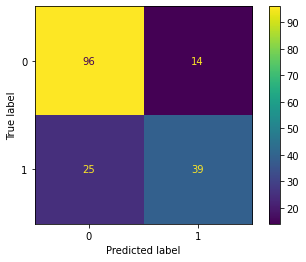

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [51]:
#Accuracy report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       110
           1       0.60      0.41      0.49        64

    accuracy                           0.68       174
   macro avg       0.66      0.63      0.63       174
weighted avg       0.67      0.68      0.67       174



Our model has an accuracy score of 68% which tell us that out of 100 our model was correct 68 times overall.

## **3. 60:40 set**

In [52]:
# Train Test Split
#will have 60% of the dataset for training and 40% for our model testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [53]:
# Training 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# Predictions 

y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [55]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[132  20]
 [ 53  27]]


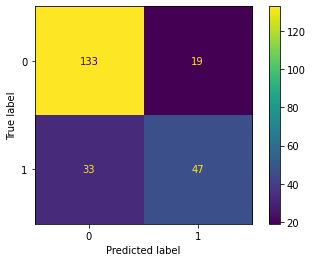

In [56]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [57]:
#Accuracy report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       152
           1       0.57      0.34      0.43        80

    accuracy                           0.69       232
   macro avg       0.64      0.60      0.60       232
weighted avg       0.67      0.69      0.66       232



Our model has an accuracy score of 69% which tell us that out of 100 our model was correct 69 times overall.

# **Conclusion**

* The partitions were as follows along with their accuracy scores

        80:20 - Model accuracy score: 72%

        70:30 - Model accuracy score: 68%

        60:40 - Model accuracy score: 69%

This clearly shows that the best accuracy was attained from 80:20 partition

